In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as sco
import yfinance as yf

In [2]:
(
    yf.Tickers(tickers=['TSLA', 'BAC', 'AAPL', 'F', 'AMD', 'AMZN', 'NVDA', 'GOOG', 'MSFT'])
    .history(period='max', auto_adjust=False, progress=False)
    .assign(Date = lambda x: x.index.tz_localize(None))
    .set_index('Date')
    .rename_axis(columns=['Variable', 'Ticker'])
    .to_csv('yahoo.csv')
)

In [3]:
yahoo = pd.read_csv(
    filepath_or_buffer='yahoo.csv',
    header=[0, 1],
    index_col=0,
    parse_dates=True
)
returns = (
    yahoo['Adj Close']
    .pct_change()
    .loc['2014-03-01':'2024-03-01', ['TSLA', 'BAC', 'AAPL', 'F', 'AMD', 'AMZN', 'NVDA', 'GOOG', 'MSFT']]
)
returns

Ticker,TSLA,BAC,AAPL,F,AMD,AMZN,NVDA,GOOG,MSFT
Date,,,,,,,,,
2014-03-03,0.023488,-0.013914,0.002888,-0.012346,-0.010782,-0.006407,-0.004897,-0.010661,-0.013835
2014-03-04,0.017082,0.026380,0.006594,0.011184,0.008174,0.011451,0.010388,0.010161,0.016676
2014-03-05,-0.008554,0.031699,0.002108,0.016916,0.002703,0.023276,0.008658,0.002757,-0.007811
2014-03-06,0.001108,0.005797,-0.003025,0.002559,0.005391,-0.000564,-0.013948,0.001108,0.001049
2014-03-07,-0.026607,-0.001153,-0.000584,-0.003191,0.058981,-0.000269,-0.001088,-0.003952,-0.006553
...,...,...,...,...,...,...,...,...,...
2024-02-26,0.038704,-0.009139,-0.007451,-0.015651,-0.002889,-0.001486,0.003489,-0.045014,-0.006824
2024-02-27,0.001655,0.019935,0.008114,0.004184,0.011306,-0.006811,-0.004944,0.009730,-0.000147
2024-02-28,0.011566,0.000875,-0.006625,0.025000,-0.008202,-0.002190,-0.013189,-0.019058,0.000589


Calculate the daily decimal returns for a portfolio of stocks from 2015 to 2024 and store them in a DataFrame called returns. Then, for each pair of stocks in the list, compute the rolling 252-trading-day correlation and store the results in a dictionary named rhos_df. Each key in the dictionary should represent a specific pair of stocks (e.g., "TSLA_BAC"), and the values should be the corresponding rolling correlation Series for that pair.

In [4]:
# Ensure the index is in datetime format
returns.index = pd.to_datetime(returns.index)
# List of stocks to calculate rolling correlations
stocks = ['TSLA', 'BAC', 'AAPL', 'F', 'AMD', 'AMZN', 'NVDA', 'GOOG', 'MSFT']

# Dictionary to store rolling correlation series
rhos = {}

# Loop through each stock and calculate rolling correlations with every other stock
for stock in stocks:
    for other_stock in stocks:
        if stock != other_stock:
            # Define a key for the correlation pair
            key = f"{stock}_{other_stock}"
            # Calculate the 252-trading-day rolling correlation
            rhos[key] = returns[stock].rolling(window=252, min_periods=252).corr(returns[other_stock])

# Convert the dictionary of Series into a DataFrame for better organization
rhos_df = pd.DataFrame(rhos).dropna()

# Display the resulting DataFrame
rhos_df

,TSLA_BAC,TSLA_AAPL,TSLA_F,TSLA_AMD,TSLA_AMZN,TSLA_NVDA,TSLA_GOOG,TSLA_MSFT,BAC_TSLA,BAC_AAPL,...,GOOG_NVDA,GOOG_MSFT,MSFT_TSLA,MSFT_BAC,MSFT_AAPL,MSFT_F,MSFT_AMD,MSFT_AMZN,MSFT_NVDA,MSFT_GOOG
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-02,0.249975,0.275488,0.339395,0.240351,0.369214,0.273622,0.401078,0.293176,0.249975,0.232893,...,0.413932,0.419154,0.293176,0.345267,0.339004,0.365197,0.141195,0.172505,0.440977,0.419154
2015-03-03,0.254383,0.275654,0.338377,0.240425,0.370663,0.272445,0.405372,0.295590,0.254383,0.233450,...,0.410744,0.414876,0.295590,0.341226,0.339272,0.367166,0.142754,0.171764,0.443428,0.414876
2015-03-04,0.249633,0.273332,0.334954,0.236946,0.368919,0.272371,0.403850,0.292217,0.249633,0.233990,...,0.409372,0.412787,0.292217,0.336482,0.339515,0.365577,0.143149,0.170176,0.440675,0.412787
2015-03-05,0.253513,0.274029,0.336911,0.237792,0.370059,0.271000,0.403750,0.291631,0.253513,0.231427,...,0.409302,0.413686,0.291631,0.345307,0.338334,0.370041,0.143248,0.173493,0.441501,0.413686
2015-03-06,0.247503,0.273603,0.339577,0.240257,0.373076,0.274789,0.406555,0.296383,0.247503,0.231566,...,0.412317,0.416639,0.296383,0.338331,0.337504,0.372737,0.146337,0.177804,0.444776,0.416639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,0.343832,0.377178,0.341367,0.261262,0.346547,0.289486,0.278111,0.283128,0.343832,0.152444,...,0.413685,0.482821,0.283128,0.048024,0.536926,0.103550,0.512842,0.557125,0.528910,0.482821
2024-02-27,0.343265,0.374053,0.339679,0.259166,0.343394,0.287617,0.275207,0.279383,0.343265,0.154803,...,0.410961,0.478461,0.279383,0.046796,0.531332,0.099088,0.510592,0.553093,0.527634,0.478461
2024-02-28,0.345503,0.371075,0.337995,0.258849,0.345002,0.287244,0.271776,0.280078,0.345503,0.154747,...,0.412385,0.477554,0.280078,0.046789,0.531283,0.098128,0.510546,0.553128,0.527439,0.477554


Using the daily decimal returns in the returns DataFrame, calculate the minimum-variance portfolio weights in two scenarios:

Assuming long-only portfolio weights (all weights are non-negative), assign these minimum-variance portfolio weights to a NumPy array weights_2.
Allowing both long and short portfolio weights, with the constraint that the sum of the long portfolio weights is less than or equal to 130% (1.3), assign these minimum-variance portfolio weights to a NumPy array weights_3.

In [5]:
def portfolio_vol(x, r, ppy):
    return np.sqrt(ppy) * r.dot(x).std()

def portfolio_mean(x, r, ppy):
    return ppy * r.dot(x).mean()

res_minimum_variance = sco.minimize(
    fun=portfolio_vol, 
    x0=np.ones(returns.shape[1]) / returns.shape[1], 
    args=(returns, 252), 
    bounds=[(0,1) for _ in returns],  
    constraints=(
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1} 
    )
)

def long_weights_sum(x):
    """Calculate the sum of long (positive) weights"""
    return np.sum(np.maximum(x, 0))

res_minimum_variance_1 = sco.minimize(
    fun=portfolio_vol, 
    x0=np.ones(returns.shape[1]) / returns.shape[1], 
    args=(returns, 252), 
    bounds=[(-1, 2) for _ in returns],  # Allow weights between -1 and 2
    constraints=[
        # Constraint 1: Sum of all weights should be 1
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        
        # Constraint 2: Sum of long weights (weights > 0) should be <= 1.3
        {'type': 'ineq', 'fun': lambda x: 1.3 - long_weights_sum(x)}
    ]
)

In [6]:
print(res_minimum_variance)

     fun: 0.22665083918777618
     jac: array([0.26165277, 0.22701548, 0.2267965 , 0.22693321, 0.27218072,
       0.22625576, 0.29569693, 0.22657692, 0.22616158])
 message: 'Optimization terminated successfully'
    nfev: 81
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.02637805e-17, 1.99481693e-01, 2.03520630e-01, 1.40953457e-01,
       0.00000000e+00, 7.26511766e-02, 2.36717132e-17, 1.77002630e-01,
       2.06390414e-01])


In [7]:
print(res_minimum_variance_1)

     fun: 0.2221469008632502
     jac: array([0.22212161, 0.22213572, 0.22211582, 0.22261392, 0.22225797,
       0.22189555, 0.22204723, 0.22212241, 0.22196884])
 message: 'Optimization terminated successfully'
    nfev: 120
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([-0.02027575,  0.19328013,  0.23942051,  0.15797816, -0.00327724,
        0.09770347, -0.11631827,  0.18902439,  0.26246459])


In [8]:
weights_2 = res_minimum_variance.x
print("Weights:",weights_2)
print("Sum of Weights:",weights_2.sum())

Weights: [1.02637805e-17 1.99481693e-01 2.03520630e-01 1.40953457e-01
 0.00000000e+00 7.26511766e-02 2.36717132e-17 1.77002630e-01
 2.06390414e-01]
Sum of Weights: 1.0


In [9]:
weights_3 = res_minimum_variance_1.x
print("Weights:", weights_3)
print("Sum of Weights:", weights_3.sum())
print("Sum of Long Weights:", long_weights_sum(weights_3))

Weights: [-0.02027575  0.19328013  0.23942051  0.15797816 -0.00327724  0.09770347
 -0.11631827  0.18902439  0.26246459]
Sum of Weights: 1.0
Sum of Long Weights: 1.1398712568916978


Calculate the maximum Sharpe Ratio portfolio weights assign them to array weights
Use the daily returns on the MATANA stocks from 2011 through 2022 (inclusive)
Use a target or benchmark return of 0 (instead of the risk-free rate)
Calculate long-only portfolio weights, but do not allow any portfolio weight to exceed 0.3
Calculate rolling Sharpe Ratios for the maximum Sharpe Ratio portfolio and assign them to series sr_rolling
Use 252-trading day windows
Require at least 200 trading days to calculate each Sharpe Ratio

In [10]:
def sharpe_ratio(x,r,ppy, rf=0):
    rp=r.dot(x)
    er=rp.sub(rf).dropna()
    return np.sqrt(ppy)*er.mean()/er.std()

def sharpe_ratio_neg(x,r,ppy,rf=0,):
    return -1*sharpe_ratio(x,r,ppy, rf=0)

_sharpe=sco.minimize(
        fun=sharpe_ratio_neg,
        x0=np.ones(returns.shape[1])/returns.shape[1], 
        args=(returns,252,0), 
        bounds=[(0,0.3) for i in range(returns.shape[1])], 
        constraints=(
        {'type':'eq','fun':lambda x: np.sum(x)-1})
)
_sharpe

     fun: -1.3962969558393408
     jac: array([ 0.06857692,  0.17380221,  0.06881607,  0.3667369 ,  0.06879161,
        0.0684678 , -0.14220956,  0.24983366,  0.05054699])
 message: 'Optimization terminated successfully'
    nfev: 70
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([5.05820555e-02, 5.33969570e-18, 1.91292365e-01, 4.74880552e-17,
       1.22039441e-01, 3.60861383e-02, 3.00000000e-01, 0.00000000e+00,
       3.00000000e-01])

In [11]:
weights = _sharpe.x
weights

array([5.05820555e-02, 5.33969570e-18, 1.91292365e-01, 4.74880552e-17,
       1.22039441e-01, 3.60861383e-02, 3.00000000e-01, 0.00000000e+00,
       3.00000000e-01])

In [12]:
sr_rolling=returns.dot(weights).rolling(window=252,min_periods=200).apply(lambda x: np.sqrt(252) *x.mean() / x.std())
sr_rolling.dropna()

Date
2014-12-12    0.999733
2014-12-15    0.930215
2014-12-16    0.793729
2014-12-17    0.970755
2014-12-18    1.115425
                ...   
2024-02-26    2.738609
2024-02-27    2.827062
2024-02-28    2.769785
2024-02-29    2.866140
2024-03-01    2.997482
Length: 2319, dtype: float64

In [13]:
# Calculate yearly portfolio returns
portfolio_yearly_returns = returns.resample('Y').apply(lambda x: (1 + x).prod() - 1).dot(weights)

# Calculate yearly rolling Sharpe ratio
sr_rolling_yearly = portfolio_yearly_returns.rolling(window=2, min_periods=2).apply(
    lambda x: x.mean() / x.std()
).dropna()

# Monthly rolling Sharpe ratio
# First, resample returns to monthly frequency
monthly_returns = returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
portfolio_monthly_returns = monthly_returns.dot(weights)

# Then calculate rolling Sharpe ratio over a 12-month window
sr_rolling_monthly = portfolio_monthly_returns.rolling(window=12, min_periods=6).apply(
    lambda x: np.sqrt(12) * x.mean() / x.std()
).dropna()

print("\nYearly Rolling Sharpe Ratio:")
print(sr_rolling_yearly)

print("\nMonthly Rolling Sharpe Ratio:")
print(sr_rolling_monthly)


Yearly Rolling Sharpe Ratio:
Date
2015-12-31    1.997165
2016-12-31    1.279250
2017-12-31    1.838785
2018-12-31    0.943152
2019-12-31    0.848365
2020-12-31    3.441636
2021-12-31    2.748631
2022-12-31    0.188113
2023-12-31    0.356136
2024-12-31    1.090573
Freq: A-DEC, dtype: float64

Monthly Rolling Sharpe Ratio:
Date
2014-08-31    2.788227
2014-09-30    1.491575
2014-10-31    1.538939
2014-11-30    1.941838
2014-12-31    1.169936
                ...   
2023-11-30    1.845018
2023-12-31    2.791520
2024-01-31    2.699287
2024-02-29    2.802490
2024-03-31    2.449234
Freq: M, Length: 116, dtype: float64


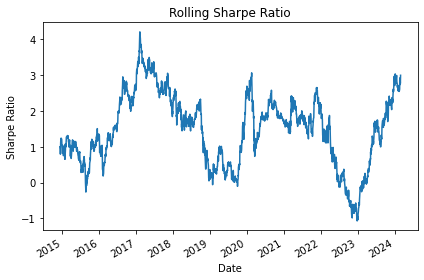

In [14]:
sr_rolling.plot()
plt.title('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.tight_layout()
plt.show()

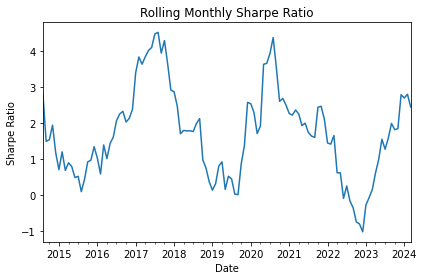

In [15]:
sr_rolling_monthly.plot()
plt.title('Rolling Monthly Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.tight_layout()
plt.show()

In [16]:
##Below is an alternative way to solve the same in form of 

In [17]:
def portfolio_analysis(tickers, start_date='2018-01-01', periods=1000):
    """
    Perform portfolio analysis including rolling correlation, monthly returns, 
    minimum variance portfolio, constrained portfolio, Sharpe ratio optimization,
    and rolling Sharpe ratio.

    Parameters:
    - tickers: List of stock tickers
    - start_date: Start date for synthetic data generation
    - periods: Number of periods for synthetic data

    Returns:
    - Results dictionary containing all calculations
    """
    # Generate synthetic daily returns
    np.random.seed(42)
    returns = pd.DataFrame(
        np.random.normal(0, 0.01, (periods, len(tickers))),
        columns=tickers,
        index=pd.date_range(start_date, periods=periods)
    )

    # Helper functions
    def calculate_rolling_correlation(returns, stock1, stock2, window=252):
        return returns[stock1].rolling(window).corr(returns[stock2])

    def calculate_monthly_returns(returns):
        returns.index = pd.to_datetime(returns.index)
        return returns.resample('M').apply(lambda x: (1 + x).prod() - 1)

    def portfolio_volatility(weights, returns, periods_per_year):
        return np.sqrt(periods_per_year) * returns.dot(weights).std()

    def sharpe_ratio(weights, returns, periods_per_year, risk_free_rate=0):
        portfolio_returns = returns.dot(weights)
        excess_returns = portfolio_returns.sub(risk_free_rate).dropna()
        return np.sqrt(periods_per_year) * excess_returns.mean() / excess_returns.std()

    def optimize_minimum_variance_portfolio(returns, periods_per_year):
        initial_weights = np.ones(returns.shape[1]) / returns.shape[1]
        constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
        bounds = [(0, 1) for _ in returns.columns]
        result = sco.minimize(
            fun=portfolio_volatility, 
            x0=initial_weights, 
            args=(returns, periods_per_year), 
            bounds=bounds,  
            constraints=constraints
        )
        return result.x

    def optimize_constrained_portfolio(returns, periods_per_year):
        initial_weights = np.ones(returns.shape[1]) / returns.shape[1]
        constraints = [
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'ineq', 'fun': lambda x: 1.3 - np.sum(np.maximum(x, 0))}
        ]
        bounds = [(-1, 2) for _ in returns.columns]
        result = sco.minimize(
            fun=portfolio_volatility, 
            x0=initial_weights, 
            args=(returns, periods_per_year), 
            bounds=bounds,  
            constraints=constraints
        )
        return result.x

    def optimize_sharpe_ratio_portfolio(returns, periods_per_year, risk_free_rate=0):
        initial_weights = np.ones(returns.shape[1]) / returns.shape[1]
        constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
        bounds = [(0, 0.3) for _ in returns.columns]

        def sharpe_ratio_objective(weights):
            return -sharpe_ratio(weights, returns, periods_per_year, risk_free_rate)

        result = sco.minimize(
            fun=sharpe_ratio_objective, 
            x0=initial_weights, 
            bounds=bounds,  
            constraints=constraints
        )
        return result.x

    def calculate_rolling_sharpe_ratio(returns, weights, window=252, min_periods=200):
        portfolio_returns = returns.dot(weights)
        return portfolio_returns.rolling(window=window, min_periods=min_periods).apply(
            lambda x: np.sqrt(252) * x.mean() / x.std()
        ).dropna()

    # Perform calculations
    rolling_corr = calculate_rolling_correlation(returns, 'AAPL', 'TSLA')
    monthly_returns = calculate_monthly_returns(returns)
    min_var_weights = optimize_minimum_variance_portfolio(returns, 252)
    constrained_weights = optimize_constrained_portfolio(returns, 252)
    sharpe_weights = optimize_sharpe_ratio_portfolio(returns, 252)
    rolling_sharpe = calculate_rolling_sharpe_ratio(returns, sharpe_weights)

    # Consolidate results
    results = {
        "rolling_correlation": rolling_corr,
        "monthly_returns": monthly_returns,
        "min_variance_weights": min_var_weights,
        "constrained_weights": constrained_weights,
        "sharpe_ratio_weights": sharpe_weights,
        "rolling_sharpe_ratio": rolling_sharpe
    }

    return results

# Example usage
tickers = ['TSLA', 'BAC', 'AAPL', 'F', 'AMD', 'AMZN', 'NVDA', 'GOOG', 'MSFT']
results = portfolio_analysis(tickers)

# Display results
print("Rolling Correlation (AAPL vs TSLA):")
print(results["rolling_correlation"].head())

print("\nMonthly Returns:")
print(results["monthly_returns"].head())

print("\nMinimum Variance Portfolio Weights:")
for ticker, weight in zip(tickers, results["min_variance_weights"]):
    print(f"{ticker}: {weight:.4f}")

print("\nConstrained Portfolio Weights:")
for ticker, weight in zip(tickers, results["constrained_weights"]):
    print(f"{ticker}: {weight:.4f}")

print("\nSharpe Ratio Optimized Weights:")
for ticker, weight in zip(tickers, results["sharpe_ratio_weights"]):
    print(f"{ticker}: {weight:.4f}")

print("\nRolling Sharpe Ratio:")
print(results["rolling_sharpe_ratio"].head())

Rolling Correlation (AAPL vs TSLA):
2018-01-01   NaN
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
Freq: D, dtype: float64

Monthly Returns:
                TSLA       BAC      AAPL         F       AMD      AMZN  \
2018-01-31  0.071106 -0.070428 -0.060635  0.029024 -0.012109  0.069566   
2018-02-28  0.013462  0.037401  0.056046 -0.046022 -0.082968  0.052361   
2018-03-31 -0.029453 -0.038206 -0.032683  0.088843 -0.059783 -0.023900   
2018-04-30  0.048083 -0.013706  0.071912 -0.018283  0.075980 -0.036371   
2018-05-31  0.078190 -0.092273  0.046144  0.021000  0.011133  0.050805   

                NVDA      GOOG      MSFT  
2018-01-31 -0.005580 -0.076051  0.008844  
2018-02-28  0.005598 -0.078419  0.052317  
2018-03-31  0.042163  0.010080  0.005878  
2018-04-30  0.030833  0.204474  0.040058  
2018-05-31  0.049318 -0.006157 -0.057821  

Minimum Variance Portfolio Weights:
TSLA: 0.0925
BAC: 0.1103
AAPL: 0.1190
F: 0.1104
AMD: 0.0962
AMZN: 0.1175
NVDA: 0.1074
GOOG: 0.112